In [293]:
import streamlit as st
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
plants = pd.read_csv("combined.csv")
plant_errors = plants[plants["error"].notnull()]
plant_data = plants[~plants["error"].notnull()]
plants_to_display = ["Epipremnum Aureum","Venus flytrap","Cactus"]

/var/folders/s2/lnyw1_r903lg1fdbpwzjl9300000gn/T/ipykernel_46246/1380780547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_data["recording_taken"] = pd.to_datetime(plant_data['recording_taken'])


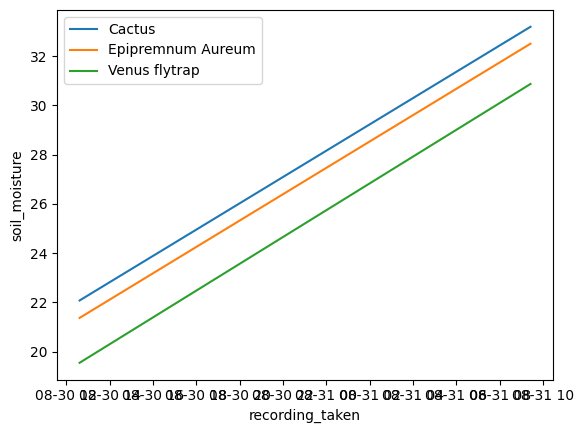

In [295]:
plant_data["recording_taken"] = pd.to_datetime(plant_data['recording_taken'])
plant_data_lineplot = plant_data[plant_data["plant_name"].isin(plants_to_display)][["plant_name","recording_taken","soil_moisture"]]
grouped_data = plant_data_lineplot.groupby("plant_name")

for plant, data in grouped_data:
    sns.lineplot(data=data, y="soil_moisture", x="recording_taken", label=plant)

plt.legend()
plt.show()

<Axes: xlabel='api_id', ylabel='error'>

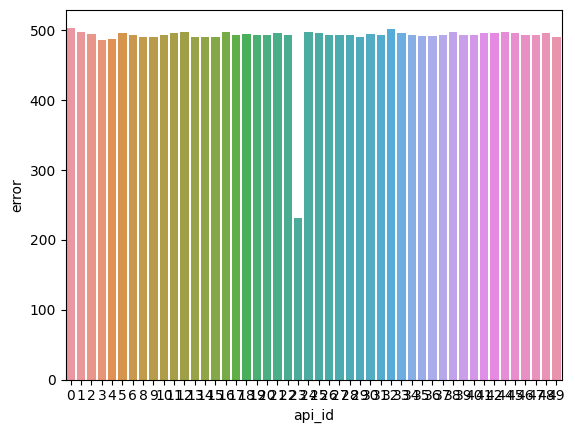

In [296]:
each_plant_error = plant_errors.groupby(["api_id"], as_index=True)
error_count = each_plant_error.count().reset_index()
error_count
sns.barplot(data=error_count, x="api_id", y="error")

<Axes: >

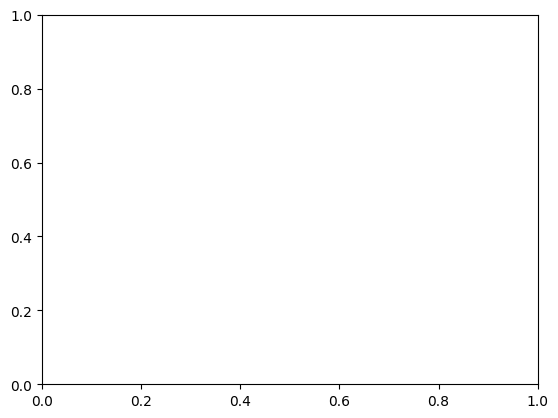

In [297]:
chosen_plants = plant_data[plant_data["plant_name"].isin(plants_to_display)]

each_plant_soil_moisture = chosen_plants.groupby(["plant_name"])["soil_moisture"]
average_soil_moisture_for_each_plant = each_plant_soil_moisture.mean()
sns.scatterplot(data=average_soil_moisture_for_each_plant)

In [298]:

keys = plant_data["continent"].unique()
from transform import remove_duplicate_plants

unique_plants = remove_duplicate_plants(plant_data)
plant_continents = unique_plants[["continent"]].value_counts()

plt.pie(plant_continents, labels=keys)

plt.show()

/Users/angelavilde/Current code/ETL-house-of-plants/pipeline/transform.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_data.drop_duplicates(subset="plant_name", keep="first", inplace=True)


In [299]:
plants = pd.read_csv("combined.csv")
plant_df = plants[plants["error"] == "No Error"]
mean_data = plant_df.groupby(["continent"], as_index=False)["temperature"].mean()

mean_data

,continent,temperature
0,Africa,12.832283
1,America,12.268874
2,Asia,12.801994
3,Europe,11.492998
4,Pacific,9.875040


In [300]:
plant_df.groupby("continent")["temperature"].median()

Series([], Name: temperature, dtype: float64)

In [301]:
plant_df.groupby(["continent"], as_index=True)["temperature"].std()


Series([], Name: temperature, dtype: float64)

In [15]:
sns.barplot(mean_data, x="continent", y="temperature")

ValueError: Could not interpret input 'continent'